In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation Preporcessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Model

In [5]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential


In [6]:
model = Sequential()

In [7]:
##Convolution Layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, ))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, ))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, ))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, ))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=1024, activation='relu'))

In [14]:
#output
model.add(Dense(units=38, activation='softmax')) #probability

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

Training

In [17]:
training_history= model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 258s 111ms/step - loss: 1.1868 - accuracy: 0.6589 - val_loss: 0.4636 - val_accuracy: 0.8516
Epoch 2/10
2197/2197 [==============================] - 241s 110ms/step - loss: 0.3344 - accuracy: 0.8909 - val_loss: 0.3785 - val_accuracy: 0.8764
Epoch 3/10
2197/2197 [==============================] - 371s 169ms/step - loss: 0.2272 - accuracy: 0.9250 - val_loss: 0.2884 - val_accuracy: 0.9112
Epoch 4/10
2197/2197 [==============================] - 701s 319ms/step - loss: 0.1760 - accuracy: 0.9410 - val_loss: 0.2789 - val_accuracy: 0.9178
Epoch 5/10
2197/2197 [==============================] - 1276s 576ms/step - loss: 0.1552 - accuracy: 0.9489 - val_loss: 0.2683 - val_accuracy: 0.9170
Epoch 6/10
2197/2197 [==============================] - 400s 182ms/step - loss: 0.1366 - accuracy: 0.9543 - val_loss: 0.3497 - val_accuracy: 0.9064
Epoch 7/10
2197/2197 [==============================] - 308s 140ms/step - loss: 0.1290 - accuracy: 0.9584 - val

In [22]:
#eval
training_loss, training_accuracy = model.evaluate(training_set)

2197/2197 [==============================] - 60s 27ms/step - loss: 0.0940 - accuracy: 0.9691


In [19]:
print(training_loss, training_accuracy)

0.09399065375328064 0.969144344329834


In [21]:
#eval
val_loss, val_accuracy = model.evaluate(validation_set) 

550/550 [==============================] - 15s 27ms/step - loss: 0.2820 - accuracy: 0.9232


In [23]:
print(val_loss, val_accuracy)

0.28196442127227783 0.9231732487678528


In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'loss': [1.1867834329605103,
  0.33441242575645447,
  0.22723649442195892,
  0.17595525085926056,
  0.15524518489837646,
  0.13656792044639587,
  0.12902261316776276,
  0.12504327297210693,
  0.1186172291636467,
  0.12398238480091095],
 'accuracy': [0.6589089035987854,
  0.8909168243408203,
  0.9250444769859314,
  0.9410200119018555,
  0.9489437341690063,
  0.9543352723121643,
  0.9583612084388733,
  0.9599260091781616,
  0.9618892073631287,
  0.9606373310089111],
 'val_loss': [0.46360087394714355,
  0.37849700450897217,
  0.28836846351623535,
  0.27887415885925293,
  0.26826342940330505,
  0.34973081946372986,
  0.3067707419395447,
  0.28050434589385986,
  0.30774468183517456,
  0.28196457028388977],
 'val_accuracy': [0.8516389727592468,
  0.8763942718505859,
  0.9111654758453369,
  0.9178237915039062,
  0.9170271158218384,
  0.9064420461654663,
  0.9188481569290161,
  0.9260186553001404,
  0.9167994260787964,
  0.9231732487678528]}

In [27]:
#recordiing
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

Visualization

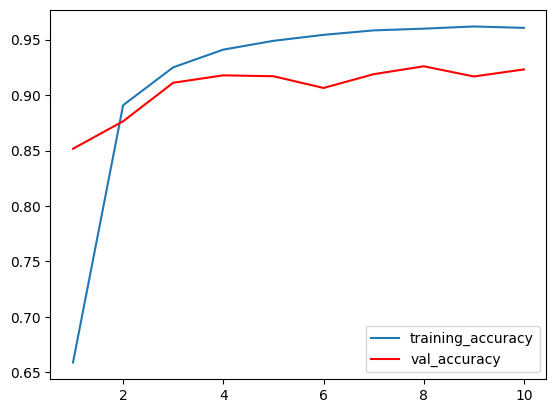

In [32]:
epochs = [i for i in range (1,11)]
epochs
plt.plot(epochs, training_history.history['accuracy'], label='training_accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.legend()
plt.show()

In [43]:
class_name = validation_set.class_names

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 14s 25ms/step


(array([[9.9999356e-01, 1.6276967e-07, 1.6552230e-08, ..., 9.3876003e-13,
         4.4574754e-11, 9.7903694e-09],
        [9.9936277e-01, 6.3663209e-04, 2.9632632e-09, ..., 9.8488946e-18,
         1.9046138e-11, 1.3519895e-13],
        [9.9998760e-01, 3.3696829e-10, 1.6431227e-07, ..., 1.3769212e-15,
         2.4556999e-11, 1.7442324e-09],
        ...,
        [2.5879670e-14, 1.9420236e-22, 3.1997367e-11, ..., 1.9045221e-12,
         2.6481185e-16, 9.9999964e-01],
        [2.0745018e-15, 1.1769580e-23, 2.7686177e-16, ..., 4.2046178e-16,
         1.6584375e-20, 1.0000000e+00],
        [8.4459774e-20, 4.7032647e-19, 4.9827302e-17, ..., 6.8382611e-16,
         2.0971436e-16, 9.9999523e-01]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(Y_true,   predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.87      0.91       504
                                 Apple___Black_rot       0.97      0.95      0.96       497
                          Apple___Cedar_apple_rust       0.97      0.88      0.92       440
                                   Apple___healthy       0.87      0.93      0.90       502
                               Blueberry___healthy       0.94      0.95      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.94      0.97       421
                 Cherry_(including_sour)___healthy       0.93      0.98      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.92      0.89       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.89      0.